In [1]:
import tensorflow

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

100%|██████████| 66.0M/66.0M [00:19<00:00, 3.59MB/s]

Extracting files...


Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3


In [3]:
import pandas as pd

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.utils import resample

In [6]:
data = pd.read_csv(r"C:\Users\USER\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3\creditcard.csv")
data.shape

(284807, 31)

In [7]:
df=pd.DataFrame(data)
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [8]:
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
df=df.drop_duplicates()
df.shape

(283726, 31)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
print(df['Amount'].mean()) 
print(df['Amount'].std()) 
print("--------------------------------")
print(df['Time'].mean()) 
print(df['Time'].std()) 

# we have to make the mean 0 and std 1 ...

88.47268731099724
250.3994371158016
--------------------------------
94811.07759951502
47481.04789061939


In [12]:
scaler=StandardScaler()
df['Amount']=scaler.fit_transform(df[['Amount']])
df['Time']=scaler.fit_transform(df[['Time']])    #why 2D is used 

In [13]:
print(df['Amount'].mean()) 
print(df['Amount'].std()) 
print("---------------------------------")
print(df['Time'].mean()) 
print(df['Time'].std()) 

-5.409346726214081e-17
1.0000017622681856
---------------------------------
1.218104744273393e-16
1.0000017622682345


In [14]:
count=df['Class'].value_counts()
count

Class
0    283253
1       473
Name: count, dtype: int64

In [15]:
from sklearn.utils import resample
majority=df[df.Class==0]
minority=df[df.Class==1]

min_unsample = resample(minority,
                        replace=True,
                        n_samples=len(majority),
                        random_state=42)
bal_df=pd.concat([majority,min_unsample])
print(bal_df.shape)

bal_df=bal_df.sample(frac=1,random_state=42).reset_index(drop=True)
bal_df.head(10)

(566506, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.580614,-14.179165,7.421370,-21.405836,11.927512,-7.974281,-2.202710,-15.471612,-0.356595,-6.380125,...,-2.366836,1.130955,0.991153,-1.033132,-0.327179,0.634693,2.171905,-1.395288,-0.349333,1
1,-1.350417,1.037209,-1.728043,-0.054283,-1.182347,-1.504138,-0.580432,-0.571171,-0.203673,-1.919427,...,0.016281,-0.067326,-0.205375,0.079323,0.347654,-0.109434,-0.010816,0.052257,0.636693,0
2,0.669403,0.259021,-3.773028,-3.795400,0.312441,-0.656807,-0.958512,1.836611,-0.798444,-1.082431,...,0.495415,-0.402454,-0.986487,0.667441,0.121997,0.888916,-0.333088,0.092343,3.859789,0
3,0.933130,-3.975939,-1.244939,-3.707414,4.544772,4.050676,-3.407679,-5.063118,1.007042,-3.190158,...,1.059737,-0.037395,0.348707,-0.162929,0.410531,-0.123612,0.877424,0.667568,-0.320180,1
4,1.383900,2.061713,-0.012144,-1.050097,0.413563,-0.101259,-1.206437,0.221051,-0.365707,0.460770,...,-0.282485,-0.654205,0.334803,0.060809,-0.281736,0.193590,-0.067297,-0.058678,-0.345419,0
5,0.979528,-6.352337,-2.370335,-4.875397,2.335045,-0.809555,-0.413647,-4.082308,2.239089,-1.986360,...,1.325218,1.226745,-1.485217,-1.470732,-0.240053,0.112972,0.910591,-0.650944,0.428066,1
6,-0.014113,-13.512074,8.215177,-16.582606,6.207369,-11.318472,-2.997207,-17.640470,0.040349,-5.620232,...,-0.907906,1.514028,-0.141879,0.789186,-0.031343,-0.255057,-1.865831,-0.442204,-0.171697,1
7,1.182325,-2.423535,1.659093,-3.071421,2.588033,1.135791,-1.892388,-2.588418,-2.226592,-1.670173,...,-0.934127,0.922038,-0.180255,-0.281719,0.299285,-0.263801,0.150156,0.292112,-0.316226,1
8,1.611360,-0.507730,0.854755,0.645291,1.653160,2.819445,4.960547,-0.162094,1.310992,-1.319074,...,0.321551,0.813516,-0.163916,0.686316,-0.259477,0.063921,0.175566,0.169116,-0.262871,0
9,-0.018767,-12.381048,8.213022,-16.962530,7.116091,-9.772826,-3.666836,-16.147363,2.078706,-4.250657,...,0.167703,1.503413,-0.767755,0.371951,-1.415639,-0.517022,-0.434621,0.292721,0.034055,1


In [16]:
count=bal_df['Class'].value_counts()
count

Class
1    283253
0    283253
Name: count, dtype: int64

In [17]:
x=bal_df.drop('Class',axis=1)
y=bal_df['Class']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)


In [19]:
model=Sequential([ Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
                  Dropout(0.5),
                  Dense(16, activation='relu'),
                  Dropout(0.5),
                  Dense(1, activation='sigmoid') 
])

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
optimizers = ['sgd', 'adam', 'rmsprop']
pred_relu = {}
for opt in optimizers:
    print("for optimizer: ",opt)
    
    model=Sequential([ Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
                  Dropout(0.5),
                  Dense(16, activation='relu'),
                  Dropout(0.3),
                  Dense(1, activation='sigmoid') 
    ])
    model.compile(optimizer=opt,
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
    train =model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2,verbose=1)
    y_pred=model.predict(x_test)
    y_pred= (y_pred > 0.5).astype("int32")
    print("Classification Report for:",opt)
    print(classification_report(y_test, y_pred))
    pred_relu[opt] = y_pred

for optimizer:  sgd
Epoch 1/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8775 - loss: 0.2895 - val_accuracy: 0.9484 - val_loss: 0.1171
Epoch 2/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9412 - loss: 0.1471 - val_accuracy: 0.9567 - val_loss: 0.0964
Epoch 3/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9491 - loss: 0.1216 - val_accuracy: 0.9651 - val_loss: 0.0826
Epoch 4/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9545 - loss: 0.1080 - val_accuracy: 0.9720 - val_loss: 0.0719
Epoch 5/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9597 - loss: 0.0964 - val_accuracy: 0.9748 - val_loss: 0.0625
Epoch 6/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9653 - loss: 0.0846 - val_accuracy: 0.9808 - val_loss: 0.0533
Epoch 7/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9703 - loss: 0.0761 - val_accuracy: 0.9875 - val_loss: 0.0448
Epoch 8/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.97

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5666/5666 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9163 - loss: 0.2025 - val_accuracy: 0.9909 - val_loss: 0.0374
Epoch 2/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9815 - loss: 0.0519 - val_accuracy: 0.9953 - val_loss: 0.0190
Epoch 3/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9855 - loss: 0.0392 - val_accuracy: 0.9969 - val_loss: 0.0159
Epoch 4/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9871 - loss: 0.0348 - val_accuracy: 0.9977 - val_loss: 0.0146
Epoch 5/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9872 - loss: 0.0340 - val_accuracy: 0.9975 - val_loss: 0.0136
Epoch 6/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9875 - loss: 0.0318 - val_accuracy: 0.9978 - val_loss: 0.0131
Epoch 7/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9874 - loss: 0.0329 - val_accuracy: 0.9980 - val_loss: 0.0120
Epoch 8/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9881 - loss: 0.0302 - val_accurac

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9176 - loss: 0.1951 - val_accuracy: 0.9873 - val_loss: 0.0442
Epoch 2/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9784 - loss: 0.0643 - val_accuracy: 0.9938 - val_loss: 0.0259
Epoch 3/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9845 - loss: 0.0470 - val_accuracy: 0.9964 - val_loss: 0.0213
Epoch 4/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9853 - loss: 0.0446 - val_accuracy: 0.9966 - val_loss: 0.0204
Epoch 5/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9868 - loss: 0.0416 - val_accuracy: 0.9955 - val_loss: 0.0200
Epoch 6/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9872 - loss: 0.0409 - val_accuracy: 0.9970 - val_loss: 0.0180
Epoch 7/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9871 - loss: 0.0411 - val_accuracy: 0.9968 - val_loss: 0.0182
Epoch 8/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9874 - loss: 0.0389 - val_accurac

In [24]:
print(pred_relu)

{'sgd': array([[1],
       [1],
       [0],
       ...,
       [0],
       [1],
       [0]]), 'adam': array([[1],
       [1],
       [0],
       ...,
       [0],
       [1],
       [0]]), 'rmsprop': array([[1],
       [1],
       [0],
       ...,
       [0],
       [1],
       [0]])}


In [25]:
optimizers = ['sgd', 'adam', 'rmsprop']
pred_tanh = {}
for opt in optimizers:
    print("for optimizer: ",opt)
    
    model=Sequential([ Dense(32, activation='tanh', input_shape=(x_train.shape[1],)),
                  Dropout(0.5),
                  Dense(16, activation='tanh'),
                  Dropout(0.3),
                  Dense(1, activation='sigmoid') 
    ])
    model.compile(optimizer=opt,
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
    train =model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2,verbose=1)
    y_pred=model.predict(x_test)
    y_pred= (y_pred > 0.5).astype("int32")
    print("Classification Report for:",opt)
    print(classification_report(y_test, y_pred))
    pred_tanh[opt] = y_pred

for optimizer:  sgd
Epoch 1/10


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8882 - loss: 0.2652 - val_accuracy: 0.9489 - val_loss: 0.1260
Epoch 2/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9402 - loss: 0.1583 - val_accuracy: 0.9503 - val_loss: 0.1148
Epoch 3/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9442 - loss: 0.1462 - val_accuracy: 0.9513 - val_loss: 0.1080
Epoch 4/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9460 - loss: 0.1401 - val_accuracy: 0.9524 - val_loss: 0.1023
Epoch 5/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9480 - loss: 0.1336 - val_accuracy: 0.9572 - val_loss: 0.0981
Epoch 6/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9504 - loss: 0.1276 - val_accuracy: 0.9562 - val_loss: 0.0942
Epoch 7/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9505 - loss: 0.1255 - val_accuracy: 0.9608 - val_loss: 0.0909
Epoch 8/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9513 - loss: 0.1235 - val_accurac

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5666/5666 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9231 - loss: 0.1885 - val_accuracy: 0.9673 - val_loss: 0.0782
Epoch 2/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9579 - loss: 0.1057 - val_accuracy: 0.9796 - val_loss: 0.0565
Epoch 3/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9643 - loss: 0.0910 - val_accuracy: 0.9826 - val_loss: 0.0470
Epoch 4/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9674 - loss: 0.0833 - val_accuracy: 0.9838 - val_loss: 0.0425
Epoch 5/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9693 - loss: 0.0799 - val_accuracy: 0.9864 - val_loss: 0.0379
Epoch 6/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9710 - loss: 0.0739 - val_accuracy: 0.9874 - val_loss: 0.0355
Epoch 7/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9727 - loss: 0.0715 - val_accuracy: 0.9884 - val_loss: 0.0334
Epoch 8/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9736 - loss: 0.0687 - val_accurac

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5666/5666 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9235 - loss: 0.1856 - val_accuracy: 0.9635 - val_loss: 0.0829
Epoch 2/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9570 - loss: 0.1092 - val_accuracy: 0.9769 - val_loss: 0.0634
Epoch 3/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9624 - loss: 0.0960 - val_accuracy: 0.9826 - val_loss: 0.0519
Epoch 4/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9659 - loss: 0.0876 - val_accuracy: 0.9836 - val_loss: 0.0435
Epoch 5/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9684 - loss: 0.0822 - val_accuracy: 0.9876 - val_loss: 0.0404
Epoch 6/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9704 - loss: 0.0785 - val_accuracy: 0.9881 - val_loss: 0.0383
Epoch 7/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9717 - loss: 0.0751 - val_accuracy: 0.9891 - val_loss: 0.0358
Epoch 8/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9726 - loss: 0.0732 - val_accurac

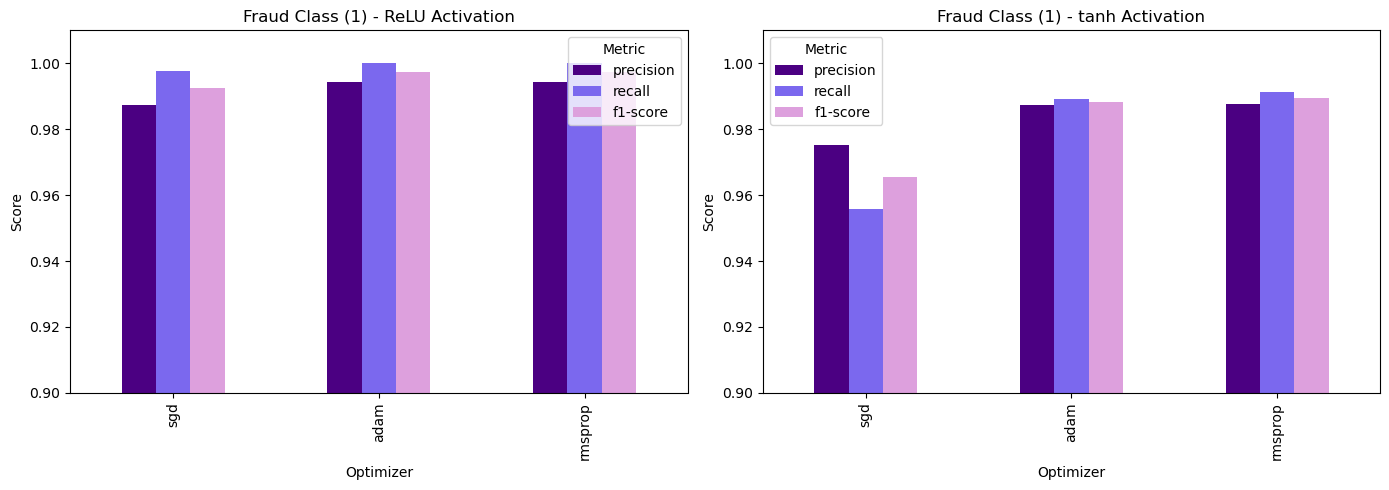

In [32]:
metrics_relu = {}
for opt in pred_relu:
    report = classification_report(y_test, pred_relu[opt], output_dict=True)
    metrics_relu[opt] = {
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1-score': report['1']['f1-score']
    }

# Collect metrics for tanh
metrics_tanh = {}
for opt in pred_tanh:
    report = classification_report(y_test, pred_tanh[opt], output_dict=True)
    metrics_tanh[opt] = {
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1-score': report['1']['f1-score']
    }

# Create DataFrames
df_relu = pd.DataFrame(metrics_relu).T
df_tanh = pd.DataFrame(metrics_tanh).T

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ReLU plot
df_relu.plot(kind='bar', ax=axes[0],color = ['#4B0082', '#7B68EE', 'plum']
)
axes[0].set_title("Fraud Class (1) - ReLU Activation")
axes[0].set_xlabel("Optimizer")
axes[0].set_ylabel("Score")
axes[0].set_ylim(0.90, 1.01)
axes[0].legend(title="Metric")

# tanh plot
df_tanh.plot(kind='bar', ax=axes[1],color = ['#4B0082', '#7B68EE', 'plum']
)
axes[1].set_title("Fraud Class (1) - tanh Activation")
axes[1].set_xlabel("Optimizer")
axes[1].set_ylabel("Score")
axes[1].set_ylim(0.90, 1.01)
axes[1].legend(title="Metric")

plt.tight_layout()
plt.show()

In [35]:
df_relu

,precision,recall,f1-score
sgd,0.987353,0.997705,0.992502
adam,0.994435,1.000000,0.997210
rmsprop,0.994435,1.000000,0.997210


<Axes: >

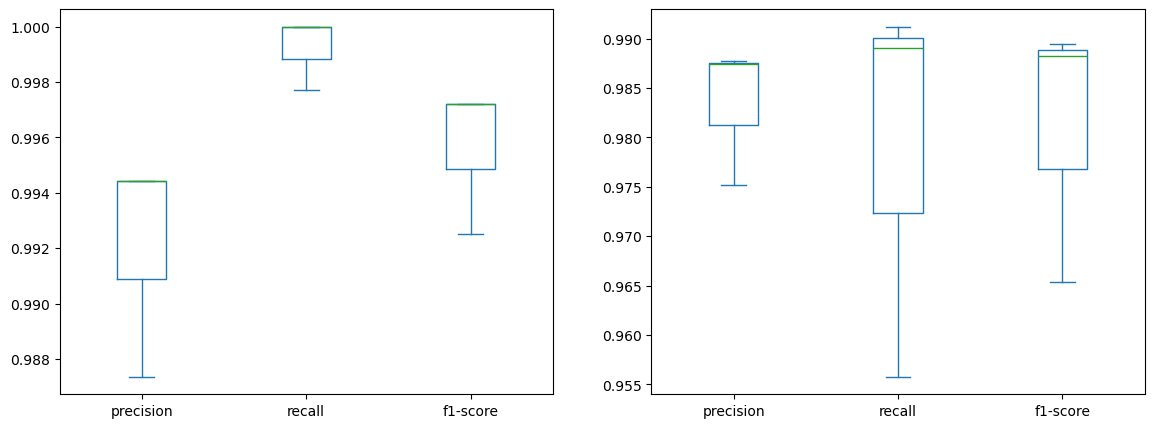

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
df_relu.plot(kind='box',ax=axes[0])
df_tanh.plot(kind='box',ax=axes[1])

<Axes: ylabel='count'>

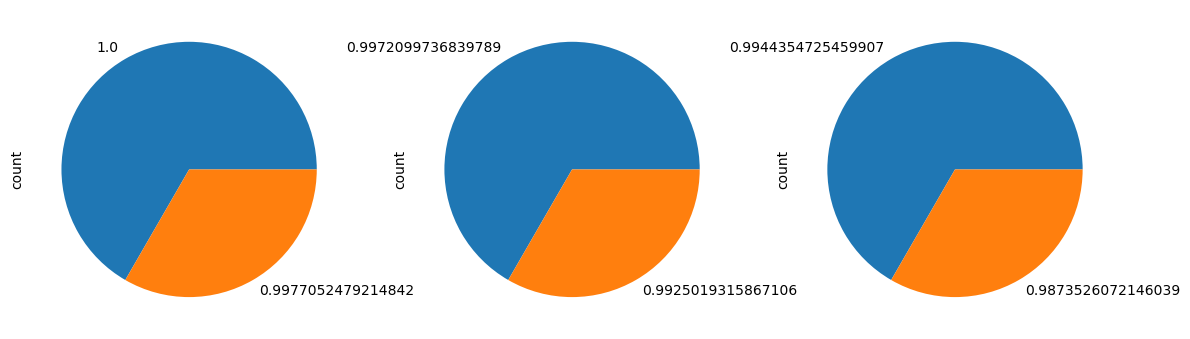

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5))
df_relu['recall'].value_counts().plot(kind='pie', ax=axes[0])
df_relu['f1-score'].value_counts().plot(kind='pie', ax=axes[1])
df_relu['precision'].value_counts().plot(kind='pie', ax=axes[2])

In [69]:
optimizers = ['sgd', 'adam', 'rmsprop']
pred = {}
for opt in optimizers:
    print("for optimizer: ",opt)
    
    model=Sequential([ Dense(32, activation='tanh', input_shape=(x_train.shape[1],)),
                  Dropout(0.5),
                  Dense(16, activation='relu'),
                  Dropout(0.3),
                  Dense(1, activation='sigmoid') 
    ])
    model.compile(optimizer=opt,
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
    train =model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2,verbose=1)
    y_pred=model.predict(x_test)
    y_pred= (y_pred > 0.5).astype("int32")
    print("Classification Report for:",opt)
    print(classification_report(y_test, y_pred))
    pred[opt] = y_pred

for optimizer:  sgd
Epoch 1/10


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8652 - loss: 0.2999 - val_accuracy: 0.9470 - val_loss: 0.1240
Epoch 2/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9408 - loss: 0.1545 - val_accuracy: 0.9504 - val_loss: 0.1123
Epoch 3/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9435 - loss: 0.1419 - val_accuracy: 0.9511 - val_loss: 0.1054
Epoch 4/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9462 - loss: 0.1340 - val_accuracy: 0.9536 - val_loss: 0.1003
Epoch 5/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9472 - loss: 0.1284 - val_accuracy: 0.9557 - val_loss: 0.0962
Epoch 6/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9489 - loss: 0.1241 - val_accuracy: 0.9586 - val_loss: 0.0917
Epoch 7/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9498 - loss: 0.1202 - val_accuracy: 0.9589 - val_loss: 0.0888
Epoch 8/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9513 - loss: 0.1160 - val_accur

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5666/5666 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9086 - loss: 0.2065 - val_accuracy: 0.9647 - val_loss: 0.0765
Epoch 2/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9588 - loss: 0.0998 - val_accuracy: 0.9729 - val_loss: 0.0576
Epoch 3/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9638 - loss: 0.0863 - val_accuracy: 0.9781 - val_loss: 0.0503
Epoch 4/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9665 - loss: 0.0777 - val_accuracy: 0.9805 - val_loss: 0.0456
Epoch 5/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9685 - loss: 0.0742 - val_accuracy: 0.9826 - val_loss: 0.0426
Epoch 6/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9704 - loss: 0.0693 - val_accuracy: 0.9834 - val_loss: 0.0401
Epoch 7/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9719 - loss: 0.0670 - val_accuracy: 0.9849 - val_loss: 0.0378
Epoch 8/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9729 - loss: 0.0638 - val

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5666/5666 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9247 - loss: 0.1835 - val_accuracy: 0.9667 - val_loss: 0.0768
Epoch 2/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9580 - loss: 0.1046 - val_accuracy: 0.9725 - val_loss: 0.0595
Epoch 3/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9615 - loss: 0.0947 - val_accuracy: 0.9754 - val_loss: 0.0536
Epoch 4/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9638 - loss: 0.0871 - val_accuracy: 0.9760 - val_loss: 0.0499
Epoch 5/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9653 - loss: 0.0832 - val_accuracy: 0.9797 - val_loss: 0.0446
Epoch 6/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9660 - loss: 0.0815 - val_accuracy: 0.9847 - val_loss: 0.0440
Epoch 7/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9678 - loss: 0.0766 - val_accuracy: 0.9865 - val_loss: 0.0414
Epoch 8/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9689 - loss: 0.0740 - val

In [71]:
optimizers = ['sgd', 'adam', 'rmsprop']
pred_2 = {}
for opt in optimizers:
    print("for optimizer: ",opt)
    
    model=Sequential([ Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
                  Dropout(0.5),
                  Dense(16, activation='tanh'),
                  Dropout(0.3),
                  Dense(1, activation='sigmoid') 
    ])
    model.compile(optimizer=opt,
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
    train =model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2,verbose=1)
    y_pred=model.predict(x_test)
    y_pred= (y_pred > 0.5).astype("int32")
    print("Classification Report for:",opt)
    print(classification_report(y_test, y_pred))
    pred_2[opt] = y_pred

for optimizer:  sgd


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8824 - loss: 0.2785 - val_accuracy: 0.9513 - val_loss: 0.1148
Epoch 2/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9448 - loss: 0.1486 - val_accuracy: 0.9649 - val_loss: 0.0915
Epoch 3/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9541 - loss: 0.1207 - val_accuracy: 0.9717 - val_loss: 0.0742
Epoch 4/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9606 - loss: 0.1037 - val_accuracy: 0.9786 - val_loss: 0.0617
Epoch 5/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9664 - loss: 0.0892 - val_accuracy: 0.9823 - val_loss: 0.0537
Epoch 6/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9706 - loss: 0.0806 - val_accuracy: 0.9877 - val_loss: 0.0462
Epoch 7/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9734 - loss: 0.0726 - val_accuracy: 0.9895 - val_loss: 0.0417
Epoch 8/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9770 - loss: 0

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5666/5666 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9183 - loss: 0.1917 - val_accuracy: 0.9900 - val_loss: 0.0375
Epoch 2/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9819 - loss: 0.0497 - val_accuracy: 0.9953 - val_loss: 0.0235
Epoch 3/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9868 - loss: 0.0375 - val_accuracy: 0.9949 - val_loss: 0.0187
Epoch 4/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9883 - loss: 0.0341 - val_accuracy: 0.9950 - val_loss: 0.0168
Epoch 5/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9898 - loss: 0.0302 - val_accuracy: 0.9952 - val_loss: 0.0158
Epoch 6/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9895 - loss: 0.0306 - val_accuracy: 0.9964 - val_loss: 0.0141
Epoch 7/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9896 - loss: 0.0301 - val_accuracy: 0.9977 - val_loss: 0.0121
Epoch 8/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9902 - loss: 0.0286 - val

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5666/5666 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9348 - loss: 0.1683 - val_accuracy: 0.9888 - val_loss: 0.0446
Epoch 2/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9804 - loss: 0.0610 - val_accuracy: 0.9930 - val_loss: 0.0265
Epoch 3/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9848 - loss: 0.0475 - val_accuracy: 0.9940 - val_loss: 0.0227
Epoch 4/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9871 - loss: 0.0425 - val_accuracy: 0.9959 - val_loss: 0.0203
Epoch 5/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9875 - loss: 0.0419 - val_accuracy: 0.9942 - val_loss: 0.0205
Epoch 6/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9879 - loss: 0.0398 - val_accuracy: 0.9957 - val_loss: 0.0195
Epoch 7/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9877 - loss: 0.0407 - val_accuracy: 0.9946 - val_loss: 0.0194
Epoch 8/10
5666/5666 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9880 - loss: 0.0398 - val

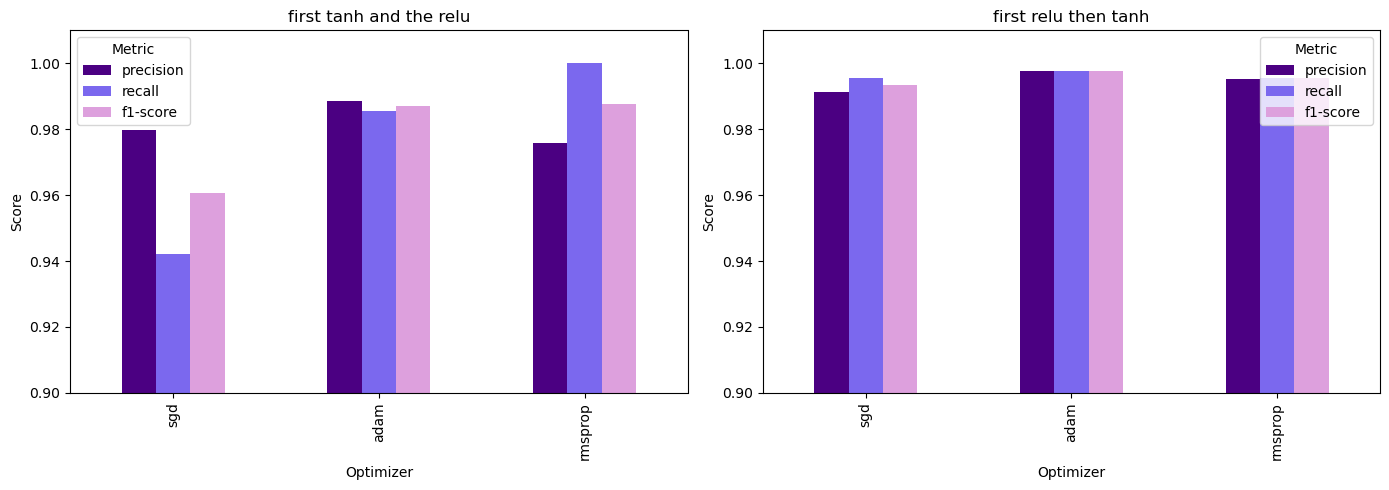

In [78]:
metrics_1 = {}
for opt in pred:
    report = classification_report(y_test, pred[opt], output_dict=True)
    metrics_1[opt] = {
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1-score': report['1']['f1-score']
    }

# Collect metrics for tanh
metrics_2= {}
for opt in pred_2:
    report = classification_report(y_test, pred_2[opt], output_dict=True)
    metrics_2[opt] = {
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1-score': report['1']['f1-score']
    }

# Create DataFrames
df_1 = pd.DataFrame(metrics_1).T
df_2 = pd.DataFrame(metrics_2).T

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ReLU plot
df_1.plot(kind='bar', ax=axes[0],color = ['#4B0082', '#7B68EE', 'plum']
)
axes[0].set_title("first tanh and the relu")
axes[0].set_xlabel("Optimizer")
axes[0].set_ylabel("Score")
axes[0].set_ylim(0.90, 1.01)
axes[0].legend(title="Metric")

# tanh plot
df_2.plot(kind='bar', ax=axes[1],color = ['#4B0082', '#7B68EE', 'plum']
)
axes[1].set_title("first relu then tanh")
axes[1].set_xlabel("Optimizer")
axes[1].set_ylabel("Score")
axes[1].set_ylim(0.90, 1.01)
axes[1].legend(title="Metric")

plt.tight_layout()
plt.show()